Q: Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree d for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial fit to the data.
    

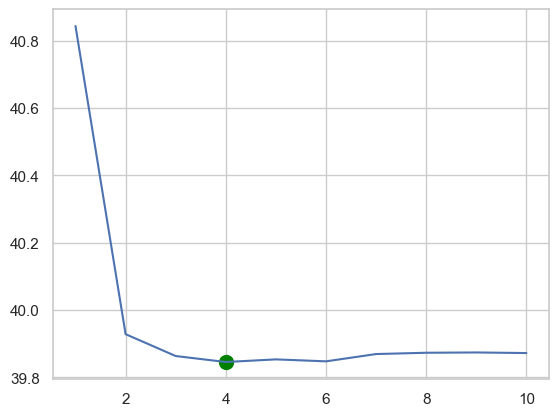

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import zscore


df = pd.read_csv("Wage.csv")

degrees = range(1, 11)
CV_RMSE = []

num_folds = 10

for i in degrees:
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(df[["age"]])

    model_temp = LinearRegression()

    cv_scores = cross_val_score(model_temp, X_poly, df["wage"], cv=num_folds, scoring="neg_mean_squared_error")
    RMSE_scores = np.sqrt(-cv_scores)

    CV_RMSE.append(np.mean(RMSE_scores))

results_df = pd.DataFrame({"degree": degrees, "CV_RMSE": CV_RMSE})

best_degree = results_df.loc[results_df["CV_RMSE"].idxmin()]

plt.plot(results_df["degree"], results_df["CV_RMSE"])
plt.scatter(best_degree["degree"], best_degree["CV_RMSE"], color="green", s=100)
plt.show()

In [26]:
df["age2"] = df["age"] ** 2
df["age3"] = df["age"] ** 3
df["age4"] = df["age"] ** 4
df["age5"] = df["age"] ** 5

fit_1 = sm.OLS(df["wage"], sm.add_constant(df[["age"]])).fit()
fit_2 = sm.OLS(df["wage"], sm.add_constant(df[["age", "age2"]])).fit()
fit_3 = sm.OLS(df["wage"], sm.add_constant(df[["age", "age2", "age3"]])).fit()
fit_4 = sm.OLS(df["wage"], sm.add_constant(df[["age", "age2", "age3", "age4"]])).fit()
fit_5 = sm.OLS(df["wage"], sm.add_constant(df[["age", "age2", "age3", "age4", "age5"]])).fit()

results = sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5)
print(results)

   df_resid           ssr  df_diff        ss_diff           F        Pr(>F)
0    2998.0  5.022216e+06      0.0            NaN         NaN           NaN
1    2997.0  4.793430e+06      1.0  228786.010128  143.593107  2.363850e-32
2    2996.0  4.777674e+06      1.0   15755.693664    9.888756  1.679202e-03
3    2995.0  4.771604e+06      1.0    6070.152124    3.809813  5.104620e-02
4    2994.0  4.770322e+06      1.0    1282.563017    0.804976  3.696820e-01


C:\Users\daner\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


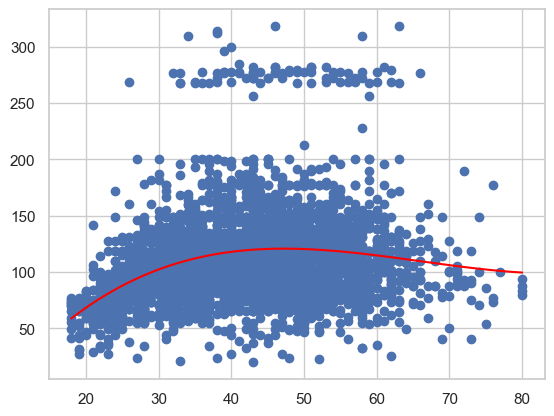

In [35]:
X = df[["age"]]
y = df["wage"]
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_pred_poly = poly.transform(X_pred)
y_pred = model.predict(X_pred_poly)

plt.scatter(df["age"], df["wage"])
plt.plot(X_pred, y_pred, color = "red")
plt.show()

Q: Fit a step function to predict wage using age, and perform crossvalidation to choose the optimal number of cuts. Make a plot of the fit obtained.

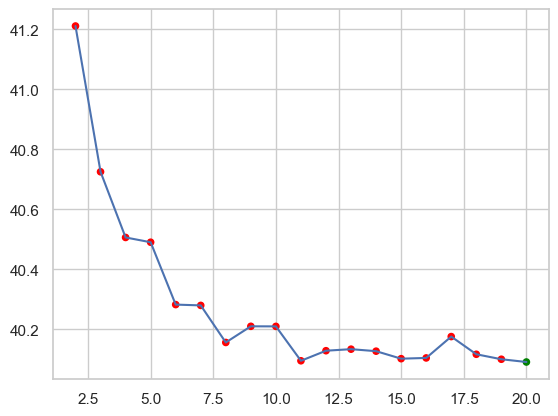

In [51]:
cv_rmse = []
cuts = list(range(2, 21))
ctrl = "cv"

for i in cuts:
    age_bins = KBinsDiscretizer(n_bins=i, encode="ordinal").fit_transform(np.array(df["age"]).reshape(-1, 1))
    age_bins = age_bins.flatten()
    X = pd.get_dummies(age_bins, prefix = "bin")
    model = LinearRegression()
    cv_scores = -1 * cross_val_score(model, X, df["wage"], cv=10, scoring = "neg_mean_squared_error")
    cv_rmse.append(np.sqrt(np.mean(cv_scores)))

results_df = pd.DataFrame({"cuts": cuts, "CV_RMSE": cv_rmse})
results_df["min_CV_RMSE"] = results_df["CV_RMSE"].eq(results_df["CV_RMSE"].min())

# Visualizar los resultados
plt.plot(results_df["cuts"], results_df["CV_RMSE"], label="CV RMSE")
plt.scatter(results_df["cuts"], results_df["CV_RMSE"], s=20, c=results_df["min_CV_RMSE"].map({True: "green", False: "red"}), label='Best Intervals')
plt.show()

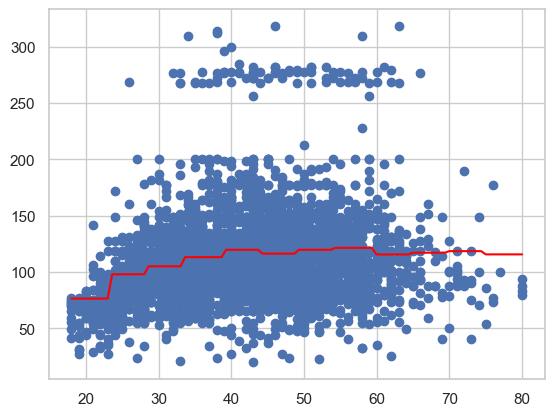

In [77]:
age_bins = KBinsDiscretizer(n_bins=12, encode="ordinal").fit_transform(np.array(df["age"]).reshape(-1, 1))
age_bins = age_bins.flatten()

X = pd.get_dummies(age_bins, prefix="bin")
model = LinearRegression()
model.fit(X, df["wage"])

age_range = np.linspace(df["age"].min(), df["age"].max(), 100)
age_range_bins = KBinsDiscretizer(n_bins=12, encode="ordinal").fit_transform(age_range.reshape(-1, 1))
age_range_bins = age_range_bins.flatten()
X_pred = pd.get_dummies(age_range_bins, prefix="bin")

y_pred = model.predict(X_pred)

plt.scatter(df["age"], df["wage"])
plt.plot(age_range, y_pred, color="red")
plt.show()